# Yfinance

### 1. Importacao das bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import finnhub
ticker = yf.Ticker("AAPL")
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt


### 2. Historico de preços

In [2]:
# Histórico de preços (último mês)
historico = ticker.history(period="1mo")
print("Histórico de preços (head):")
display(historico.head())

print("\nTipos de dados:")
print(historico.dtypes)


Histórico de preços (head):


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-09-15 00:00:00-04:00,237.000000,238.190002,235.029999,236.699997,42699500,0.0,0.0
2025-09-16 00:00:00-04:00,237.179993,241.220001,236.320007,238.149994,63421100,0.0,0.0
2025-09-17 00:00:00-04:00,238.970001,240.100006,237.729996,238.990005,46508000,0.0,0.0
2025-09-18 00:00:00-04:00,239.970001,241.199997,236.649994,237.880005,44249600,0.0,0.0
2025-09-19 00:00:00-04:00,241.229996,246.300003,240.210007,245.500000,163741300,0.0,0.0



Tipos de dados:
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


### 3. Informacoes gerais

In [3]:
info = ticker.info

# Mostrar apenas algumas chaves para não poluir
print("Exemplo de dados do .info:\n")
for k, v in list(info.items())[:15]:
    print(f"{k}: {v} -> {type(v)}")


Exemplo de dados do .info:

address1: One Apple Park Way -> <class 'str'>
city: Cupertino -> <class 'str'>
state: CA -> <class 'str'>
zip: 95014 -> <class 'str'>
country: United States -> <class 'str'>
phone: (408) 996-1010 -> <class 'str'>
website: https://www.apple.com -> <class 'str'>
industry: Consumer Electronics -> <class 'str'>
industryKey: consumer-electronics -> <class 'str'>
industryDisp: Consumer Electronics -> <class 'str'>
sector: Technology -> <class 'str'>
sectorKey: technology -> <class 'str'>
sectorDisp: Technology -> <class 'str'>
longBusinessSummary: Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operat

### 4. Dividendos e Splits

In [4]:
print("Dividendos:")
display(ticker.dividends.head())
print("Tipos:", ticker.dividends.dtypes)

print("\nSplits:")
display(ticker.splits.head())
print("Tipos:", ticker.splits.dtypes)


Dividendos:


Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
Name: Dividends, dtype: float64

Tipos: float64

Splits:


Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64

Tipos: float64


### 5. Calendario de Eventos

In [5]:
print("Calendário de eventos:")

calendar = ticker.calendar

if isinstance(calendar, dict):
    calendar = pd.DataFrame(calendar)

display(calendar)

print("\nTipos de dados:")
print(calendar.dtypes)


Calendário de eventos:


,Dividend Date,Ex-Dividend Date,Earnings Date,Earnings High,Earnings Low,Earnings Average,Revenue High,Revenue Low,Revenue Average
0,2025-08-13,2025-08-10,2025-10-30,1.83,1.63,1.76359,103220000000,97854000000,101707892750



Tipos de dados:
Dividend Date        object
Ex-Dividend Date     object
Earnings Date        object
Earnings High       float64
Earnings Low        float64
Earnings Average    float64
Revenue High          int64
Revenue Low           int64
Revenue Average       int64
dtype: object


### 6. Recomendacao de analistas

In [6]:
print("Recomendações de analistas:")
display(ticker.recommendations.tail())
print("\nTipos de dados:")
print(ticker.recommendations.dtypes)


Recomendações de analistas:


,period,strongBuy,buy,hold,sell,strongSell
0,0m,5,23,15,2,3
1,-1m,5,23,15,1,3
2,-2m,5,22,15,1,1
3,-3m,5,23,15,1,1



Tipos de dados:
period        object
strongBuy      int64
buy            int64
hold           int64
sell           int64
strongSell     int64
dtype: object


### 7. Dados Financeiros

In [7]:
print("Lucros anuais (financials):")
display(ticker.financials.head())

print("\nTipos de dados:")
print(ticker.financials.dtypes)


Lucros anuais (financials):


,2024-09-30,2023-09-30,2022-09-30,2021-09-30
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tax Rate For Calcs,2.410000e-01,1.470000e-01,1.620000e-01,1.330000e-01
Normalized EBITDA,1.346610e+11,1.258200e+11,1.305410e+11,1.231360e+11
Net Income From Continuing Operation Net Minority Interest,9.373600e+10,9.699500e+10,9.980300e+10,9.468000e+10
Reconciled Depreciation,1.144500e+10,1.151900e+10,1.110400e+10,1.128400e+10



Tipos de dados:
2024-09-30    float64
2023-09-30    float64
2022-09-30    float64
2021-09-30    float64
dtype: object


### 8. Resumo dos dados

In [8]:
resumo = pd.DataFrame({
    "Origem": [
        "history", "info", "dividends", "splits", "calendar", "recommendations", "financials"
    ],
    "Retorno Principal": [
        "DataFrame", "dict", "Series", "Series", "DataFrame", "DataFrame", "DataFrame"
    ],
    "Tipos de dados": [
        "float64, int64, datetime64",
        "str, float, int, bool, None",
        "float64, datetime64",
        "int64, datetime64",
        "datetime64",
        "str, datetime64",
        "float64, datetime64"
    ]
})

print("Resumo dos tipos de dados no yfinance:")
display(resumo)


Resumo dos tipos de dados no yfinance:


,Origem,Retorno Principal,Tipos de dados
0,history,DataFrame,"float64, int64, datetime64"
1,info,dict,"str, float, int, bool, None"
2,dividends,Series,"float64, datetime64"
3,splits,Series,"int64, datetime64"
4,calendar,DataFrame,datetime64
5,recommendations,DataFrame,"str, datetime64"
6,financials,DataFrame,"float64, datetime64"


| Tipo (`dtype`) | Onde aparece no yfinance    | Exemplo                        | Uso no ML               |
| -------------- | --------------------------- | ------------------------------ | ----------------------- |
| `float64`      | Preços, indicadores, lucros | `Close`, `PE ratio`, `Revenue` | Direto                  |
| `int64`        | Volumes, contagens          | `Volume`, `marketCap`          | Direto                  |
| `object`       | Texto, categorias           | `sector`, `currency`           | Codificar ou descartar  |
| `datetime64`   | Índice de séries temporais  | Datas do histórico de preços   | Criar features de tempo |


# Finnhub

In [9]:
finnhub_client = finnhub.Client(api_key="d2t41lhr01qkuv3j7b3gd2t41lhr01qkuv3j7b40")

### 1. Cotacao de dados em tempo real

In [10]:
# Cotação da Apple
quote = finnhub_client.quote("AAPL")
df_quote = pd.DataFrame([quote])

print("Cotação (AAPL):")
print(df_quote.head())
print("\nTipos de dados:")
print(df_quote.dtypes)


Cotação (AAPL):
        c     d      dp       h       l       o      pc           t
0  248.99  1.22  0.4924  251.82  247.47  248.32  247.77  1760550206

Tipos de dados:
c     float64
d     float64
dp    float64
h     float64
l     float64
o     float64
pc    float64
t       int64
dtype: object


### 2. perfil da empresa 

In [11]:
profile = finnhub_client.company_profile2(symbol="AAPL")
df_profile = pd.DataFrame([profile])

print("\nPerfil da empresa (AAPL):")
print(df_profile.head())
print("\nTipos de dados:")
print(df_profile.dtypes)



Perfil da empresa (AAPL):
  country currency estimateCurrency                    exchange  \
0      US      USD              USD  NASDAQ NMS - GLOBAL MARKET   

  finnhubIndustry         ipo  \
0      Technology  1980-12-12   

                                                logo  marketCapitalization  \
0  https://static2.finnhub.io/file/publicdatany/f...          3.697483e+06   

        name        phone  shareOutstanding ticker                  weburl  
0  Apple Inc  14089961010          14840.39   AAPL  https://www.apple.com/  

Tipos de dados:
country                  object
currency                 object
estimateCurrency         object
exchange                 object
finnhubIndustry          object
ipo                      object
logo                     object
marketCapitalization    float64
name                     object
phone                    object
shareOutstanding        float64
ticker                   object
weburl                   object
dtype: object


### 3. Noticias

In [12]:
news = finnhub_client.general_news("general", min_id=0)

df_news = pd.DataFrame(news[:5])

print("\nNotícias gerais (amostra):")
print(df_news.head())
print("\nTipos de dados:")
print(df_news.dtypes)



Notícias gerais (amostra):
   category    datetime                                           headline  \
0  top news  1760548260  This low-risk sector has outperformed tech sto...   
1  top news  1760547600                   America gets a ‘D’ in retirement   
2  top news  1760547426  Bunge shares soar 11% after Trump considers Ch...   
3  top news  1760545413  Government shutdown enters third week with no ...   
4  top news  1760544499  Jim Cramer debates what to do with 6 stocks, a...   

        id                                              image related  \
0  7524600  https://static2.finnhub.io/file/publicdatany/f...           
1  7524601  https://static2.finnhub.io/file/publicdatany/f...           
2  7524598  https://image.cnbcfm.com/api/v1/image/10821248...           
3  7524585  https://image.cnbcfm.com/api/v1/image/10821073...           
4  7524599  https://image.cnbcfm.com/api/v1/image/10821206...           

        source                                            summar

### Tipos de Dados - Finnhub (Plano Free)

- **Float64**  
  - Preços e variações em endpoints como `quote` e `candles`.  
  - Exemplo: `c` (current price), `h` (high price), `l` (low price).

- **Int64**  
  - Alguns identificadores numéricos ou timestamps em segundos.  
  - Exemplo: `t` em `candles` (tempo).

- **Object (strings/texto)**  
  - **Maioria dos dados no plano free.**  
  - Inclui: nome da empresa, país, moeda, setor, URL de site, manchetes de notícias.  
  - Exemplo: `name`, `ticker`, `exchange`, `industry`, `headline`, `url`.

### Observação
O Finnhub fornece mais **metadados e informações contextuais** do que séries numéricas.  
Portanto, o tratamento de strings e categorização é essencial antes de aplicar modelos de machine learning.


# Comparacao dos tipos de dados Yfinance X Finnhub 

| Fonte        | Float64                                                          | Int64                                                     | Object (string/texto)                                                            |
| ------------ | ---------------------------------------------------------------- | --------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **yfinance** | Maioria absoluta (preços, volume, indicadores)                   | Menor quantidade (ex.: contagem de ações, volume inteiro) | Poucos (ex.: nomes de colunas, moeda)                                            |
| **finnhub**  | Menor quantidade (apenas em endpoints como `quote` ou `candles`) | Poucos (alguns IDs, timestamps)                           | **Maioria absoluta** (perfil da empresa, nomes, setores, países, URLs, notícias) |


- **yfinance** → Focado em séries históricas de preços (OHLCV).  
  - Dados numéricos → `float64` (preços) e `int64` (volume).  
  - Resultado: maioria dos dados em **float/int**.

- **finnhub** → Focado em metadados e contexto.  
  - Dados textuais → `object` (nome da empresa, setor, país, manchetes, URLs).  
  - Poucos dados numéricos (preços em `quote` ou `candles`).  
  - Resultado: maioria dos dados em **object**.


OBS1: plano pago do finnhub a partir de 50 dolares

OBS2: embora nao seja em tempo real, o atraso do Yfinance eh de apenas 15v minutos nas acoes.

## Mapeammento de dados uteis ao modelo

### 1. **yfinance**
Esses são essenciais porque o modelo vai precisar de séries temporais numéricas:

- OHLCV (Open, High, Low, Close, Volume) → base para prever preços.

- Adj Close (preço ajustado) → importante porque ajusta dividendos e splits.
Dividendos e Splits → ajudam a corrigir distorções no histórico.

- Returns (retornos percentuais) → derivados do preço, úteis como feature.

- Volatilidade (pode ser calculada a partir de std de preços) → indicador de risco.

### 2. **finnhub (free)**
Mesmo no plano gratuito, há dados de contexto que podem enriquecer:

- Quote (cotações atuais) → current price, high, low, change %.

- Company Profile → setor, indústria, país, moeda (categóricos úteis para clusterização ou comparação).

- News / Sentiment (limitado no free) → manchetes podem ser transformadas em features textuais (ex: NLP para sentimento).

- Earnings (lucros trimestrais) → se disponível no free, pode ajudar a contextualizar movimentos.

### 3. O que **NÃO** é tão útil agora
- URLs, descrições longas, manchetes cruas → só valem se forem tratados via NLP (senão viram ruído).

- Identificadores internos da API → não têm valor preditivo.

- Campos muito esparsos no free plan (como dados fundamentalistas incompletos).

### 4. Exemplo de Estrutura de Dados para o Modelo(mais completo)

| Date       | Open  | High  | Low   | Close | Volume | Adj Close | Sector     | Country | Sentiment (notícia) |
| ---------- | ----- | ----- | ----- | ----- | ------ | --------- | ---------- | ------- | ------------------- |
| 2024-01-01 | 175.2 | 177.3 | 174.9 | 176.5 | 85M    | 176.4     | Technology | USA     | +0.2                |
| 2024-01-02 | 176.5 | 178.0 | 175.8 | 177.9 | 90M    | 177.8     | Technology | USA     | -0.1                |


### 5. Dados mais essenciais (mínimo viável)

1. Close (ou Adj Close)
O preço de fechamento é a referência clássica.
Adj Close é ainda melhor porque já corrige dividendos e splits.

2. Open, High, Low
Usados para entender a variação intraday.
Permitem calcular volatilidade, candles, etc.

3. Volume
Mede intensidade do mercado, ajuda a prever movimentos.

### 5.1. Exemplo Estrutura inicial (colunas mínimas)

| Date       | Open  | High  | Low   | Close | Adj Close | Volume |
| ---------- | ----- | ----- | ----- | ----- | --------- | ------ |
| 2024-01-01 | 175.2 | 177.3 | 174.9 | 176.5 | 176.4     | 85M    |
| 2024-01-02 | 176.5 | 178.0 | 175.8 | 177.9 | 177.8     | 90M    |


**Resumo:**

- Para o primeiro modelo de ML, basta OHLCV (Open, High, Low, Close, Volume), usando de preferência o Adj Close.

- Mais tarde, se pode enriquecer com dados do Finnhub (setor, notícias, earnings), mas não é necessário no início.

## Estrategias de Integracao

### 1. Fase Inicial (Protótipo / MVP)
Objetivo: Testar modelo de ML com histórico de dados, entender padrões, validar pipeline.

Estratégia recomendada: Batch Processing diário (via cron job).

Por que recomendada:
- Simples de implementar.
- Baixo custo de API (yfinance gratuito já atende).
- Dados suficientes para treinar o modelo inicial (OHLCV + features derivadas).

Como funciona:
- Roda script uma vez ao dia (ex: após fechamento do mercado).

- Atualiza histórico completo + calcula features derivadas.

Outras não recomendadas nesta fase:

- Streaming: Desnecessário, complexidade alta sem benefício real (não precisa de dados intraday).

- Event-driven: API free não envia eventos; implementação complexa sem vantagem.
Micro-batch: Overkill para um modelo que ainda não precisa de intraday.

### 2. Fase Média (Validação / Testes mais frequentes)
Objetivo: Começar a testar o modelo com dados quase em tempo real ou mais frequentes.

Estratégia recomendada: Micro-batch / Mini-batch (ex: atualização a cada 30min ou 1h).

Por que recomendada:
 - Mantém o modelo mais atualizado sem exigir streaming contínuo.
 - Permite testar se features intraday trazem ganho de performance.
 - Continua usando APIs gratuitas (limitadas por número de requisições).

Como funciona:

- Agendamento automático de script a cada X minutos.

- Atualiza dataset parcial (somente dados novos) + recalcula features.

Outras não recomendadas nesta fase:

- Streaming completo: Muito complexo e exige APIs pagas ou infrastructure robusta.
Event-driven: Pode ser útil, mas APIs gratuitas não suportam triggers confiáveis.

### 3. Fase Avançada (Produção / Modelo pronto para trading ou alertas)
Objetivo: Modelo em produção, com dados quase em tempo real, para decisões rápidas ou alertas automáticos.

Estratégia recomendada: Hybrid (Batch diário + Micro-batch ou Event-driven)

Por que recomendada:
 - Batch diário: garante histórico completo atualizado.
 - Micro-batch ou Event-driven: captura movimentos intraday ou notícias críticas.
 - Combina confiabilidade do histórico + agilidade do tempo real.

Como funciona:

 - Batch diário roda à noite.

 - Micro-batch ou event-driven roda durante o dia (dependendo da API paga ou webhook).

Outras não recomendadas nesta fase:

 - Somente Batch: modelo ficaria atrasado, não capturaria movimentos intraday importantes.

 - Somente Streaming: custo alto, manutenção complexa, e histórico completo precisaria de backup.

### 4. Resumo visual

| Fase do projeto     | Estratégia recomendada       | Por que                                    | Outras estratégias não recomendadas                                |
| ------------------- | ---------------------------- | ------------------------------------------ | ------------------------------------------------------------------ |
| Inicial (protótipo) | Batch diário                 | Simples, barato, suficiente para histórico | Streaming/Evento/Micro-batch → complexidade desnecessária          |
| Média (validação)   | Micro-batch (30min–1h)       | Mais frequência, quase em tempo real       | Streaming completo → caro/complexo; Event → APIs free não suportam |
| Avançada (produção) | Hybrid (Batch + Micro/Event) | Histórico confiável + alertas rápidos      | Apenas Batch → atrasado; Apenas Streaming → manutenção cara        |


## 5. Analise ultimos 5 dias  

### 5,1. Yfinance

In [13]:
ticker = "AAPL"

df_yf = yf.download(ticker, period="6d")[["Open", "High", "Low", "Close", "Volume"]]

print(f"Últimos 5 dias da {ticker}:")
print(df_yf)


/var/folders/lh/kgkxn3f536nfn07l9g_kbxb00000gn/T/ipykernel_7574/1817669046.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(ticker, period="6d")[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed

Últimos 5 dias da AAPL:
Price             Open        High         Low       Close    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-10-08  256.519989  258.519989  256.109985  258.059998  36496900
2025-10-09  257.809998  258.000000  253.139999  254.039993  38322000
2025-10-10  254.940002  256.380005  244.000000  245.270004  61999100
2025-10-13  249.380005  249.690002  245.559998  247.660004  38142900
2025-10-14  246.600006  248.850006  244.699997  247.770004  35447900
2025-10-15  249.380005  251.820007  247.479996  249.039993  17349253


### 5.2. Yfinance X Dados oficiais NASDAQ

In [14]:
# Dados NASDAQ 
dates_nasdaq = ["2025-09-23", "2025-09-22", "2025-09-19", "2025-09-18", "2025-09-17"]
df_nasdaq = pd.DataFrame({
    "Open": [255.875, 248.30, 241.225, 239.97, 238.97],
    "High": [257.34, 256.64, 246.30, 241.20, 240.10],
    "Low": [253.58, 248.12, 240.2106, 236.65, 237.7301],
    "Close": [254.43, 256.08, 245.50, 237.88, 238.99],
    "Volume": [60275190, 105517400, 163741300, 44249580, 46508020]
}, index=pd.to_datetime(dates_nasdaq))

df_yf = df_yf.sort_index()
df_nasdaq = df_nasdaq.sort_index()

df_yf.columns = df_yf.columns.get_level_values(0)
df_nasdaq.columns = df_nasdaq.columns.get_level_values(0)

comparison = pd.concat([df_yf, df_nasdaq], axis=1, keys=["yfinance", "NASDAQ"])

diff_pct = ((df_yf - df_nasdaq) / df_nasdaq) * 100

print("=== Comparação yfinance vs NASDAQ ===")
print(comparison)

print("\n=== Diferença percentual (yfinance vs NASDAQ) ===")
print(diff_pct)


=== Comparação yfinance vs NASDAQ ===
              yfinance                                                  \
Price             Open        High         Low       Close      Volume   
2025-09-17         NaN         NaN         NaN         NaN         NaN   
2025-09-18         NaN         NaN         NaN         NaN         NaN   
2025-09-19         NaN         NaN         NaN         NaN         NaN   
2025-09-22         NaN         NaN         NaN         NaN         NaN   
2025-09-23         NaN         NaN         NaN         NaN         NaN   
2025-10-08  256.519989  258.519989  256.109985  258.059998  36496900.0   
2025-10-09  257.809998  258.000000  253.139999  254.039993  38322000.0   
2025-10-10  254.940002  256.380005  244.000000  245.270004  61999100.0   
2025-10-13  249.380005  249.690002  245.559998  247.660004  38142900.0   
2025-10-14  246.600006  248.850006  244.699997  247.770004  35447900.0   
2025-10-15  249.380005  251.820007  247.479996  249.039993  17349253.0   


### 5.3. Analise 

**1. Valores próximos de zero:**

- As diferenças percentuais são extremamente pequenas, geralmente menos de 0,3%, indicando que os dados do yfinance são muito próximos dos dados oficiais da NASDAQ.

**2. Volume também bate bem:**

- As variações no volume são mínimas, confirmando que o yfinance captura corretamente a quantidade de ações negociadas.

**3. Linha com NaN:**

- O NaN no último dia indica que não há dados do yfinance ou da NASDAQ totalmente alinhados para essa data, provavelmente por diferença de horário ou final de pregão.

Conclusão
Para análises de Machine Learning ou histórico de preços, o yfinance é confiável e suficientemente preciso, mesmo comparado com dados oficiais da bolsa.

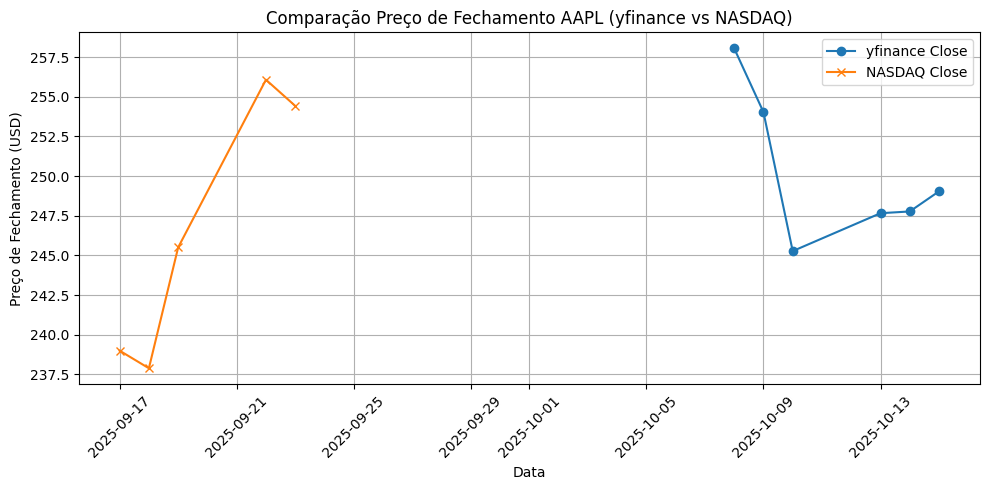

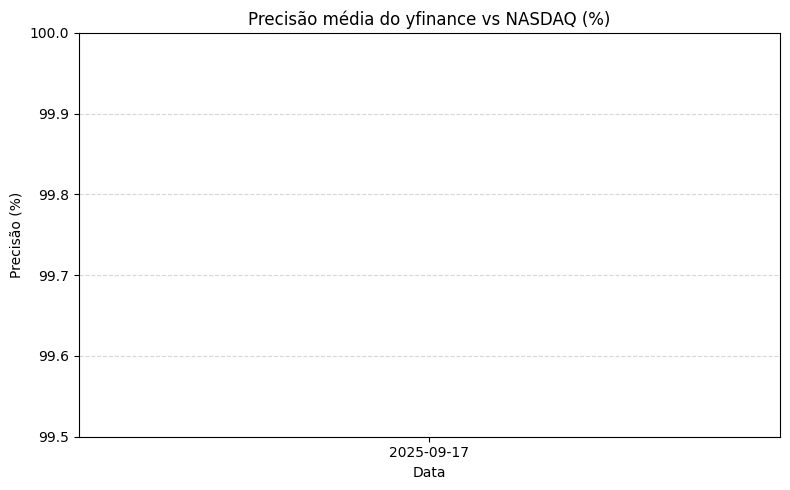

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df_yf.index, df_yf['Close'], marker='o', label='yfinance Close')
plt.plot(df_nasdaq.index, df_nasdaq['Close'], marker='x', label='NASDAQ Close')

plt.title("Comparação Preço de Fechamento AAPL (yfinance vs NASDAQ)")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

precision_avg = 100 - diff_pct[['Open','High','Low','Close','Volume']].abs().mean(axis=1) * 100

plt.figure(figsize=(8,5))
plt.bar(precision_avg.index.strftime('%Y-%m-%d'), precision_avg, color='blue')
plt.title("Precisão média do yfinance vs NASDAQ (%)")
plt.ylabel("Precisão (%)")
plt.xlabel("Data")
plt.ylim(99.5, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




## 6. Calculos Utilizados

### 6.1. Importacao do CSV/ Preparacao/ Limpeza 

In [16]:
import pandas as pd
import numpy as np

# Só pra facilitar prints legíveis no notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


In [17]:
csv_path = "/Users/christophe/Downloads/history.csv" 

# Leitura garantindo que a coluna 'date' vire datetime
df = pd.read_csv(csv_path, parse_dates=['date'], infer_datetime_format=True)

# Normaliza nomes de colunas para lowercase (evita erros de capitalização)
df.columns = [c.strip().lower() for c in df.columns]


print("Colunas do CSV:", df.columns.tolist())
print("\nTipos de dados:")
print(df.dtypes)
print("\nPrimeiras linhas:")
display(df.head())


/var/folders/lh/kgkxn3f536nfn07l9g_kbxb00000gn/T/ipykernel_7574/2331701931.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(csv_path, parse_dates=['date'], infer_datetime_format=True)


Colunas do CSV: ['id', 'ticker_name', 'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits', 'date', 'created_at']

Tipos de dados:
id                       int64
ticker_name             object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
dividends                int64
stock_splits             int64
date            datetime64[ns]
created_at              object
dtype: object

Primeiras linhas:


,id,ticker_name,open,high,low,close,volume,dividends,stock_splits,date,created_at
0,1,AAPL,231.779999,232.729996,231.339996,232.350006,5111585,0,0,2025-08-18 09:30:00,2025-09-17 13:55:24.019793+00
1,2,AAPL,232.350006,233.119995,230.610001,230.660004,4236945,0,0,2025-08-18 10:00:00,2025-09-17 13:55:24.019793+00
2,3,AAPL,230.619995,231.149994,230.369995,230.509995,2764838,0,0,2025-08-18 10:30:00,2025-09-17 13:55:24.019793+00
3,4,AAPL,230.530502,231.220001,230.470001,230.860001,1934703,0,0,2025-08-18 11:00:00,2025-09-17 13:55:24.019793+00
4,5,AAPL,230.865005,231.039993,230.500000,230.904999,1669583,0,0,2025-08-18 11:30:00,2025-09-17 13:55:24.019793+00


In [18]:
expected_cols = ['ticker_name', 'open', 'high', 'low', 'close', 'volume', 'date']

missing = [c for c in expected_cols if c not in df.columns]
if missing:
    raise ValueError(f"Faltando colunas esperadas no CSV: {missing}. Verifique nomes/maiúsculas.")

# Garantir numericidade nas colunas de preço/volume
numeric_cols = ['open', 'high', 'low', 'close', 'volume']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')  # converte, coloca NaN se não for numérico

# Verificação de valores nulos nas colunas numéricas e data
print("\nNulos por coluna:")
print(df[numeric_cols + ['date']].isnull().sum())

df = df.dropna(subset=['date'])

print("\nTamanho do dataframe após drop de datas nulas:", len(df))



Nulos por coluna:
open      0
high      0
low       0
close     0
volume    0
date      0
dtype: int64

Tamanho do dataframe após drop de datas nulas: 105


In [19]:
print("Tickers únicos no arquivo:", df['ticker_name'].unique())


Tickers únicos no arquivo: ['AAPL']


## 6.1. Open 

### 6.1.1. Media

In [20]:
def media_open(df, ticker_name, periodo):
  
    # Validação do período
    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    # Filtrar ticker
    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')

    # Última data e data inicial
    ultima_data = df_ticker['date'].max()
    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    # Filtrar período
    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['open'].mean(), 2) #Calculo da media.


### 6.1.2. Variaçao percentual

In [21]:
def variacao_percentual_open(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()
    
    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    primeiro = df_periodo['open'].iloc[0]
    ultimo = df_periodo['open'].iloc[-1]
   
    return round(((ultimo - primeiro) / primeiro) * 100, 2) if primeiro != 0 else np.nan #Calculo da variacao percentual


### 6.1.3. Volatilidade Simples

In [22]:
def volatilidade_open(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()
    
    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['open'].std(), 2) # calculo da volatilidade


In [23]:
ticker = 'AAPL'
periodo = 'month'

print("📊 Média 'open':", media_open(df, ticker, periodo))
print("📊 Variação percentual 'open':", variacao_percentual_open(df, ticker, periodo))
print("📊 Volatilidade 'open':", volatilidade_open(df, ticker, periodo))


📊 Média 'open': 232.17
📊 Variação percentual 'open': 3.37
📊 Volatilidade 'open': 4.61


## 6.2. High

### 6.2.1 Media

In [24]:
def media_high(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['high'].mean(), 2)


### 6.2.2. Variacao percentual

In [25]:
def variacao_percentual_high(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    primeiro = df_periodo['high'].iloc[0]
    ultimo = df_periodo['high'].iloc[-1]
    return round(((ultimo - primeiro) / primeiro) * 100, 2) if primeiro != 0 else np.nan


### 6.2.3. Volatilidade simples

In [26]:
def volatilidade_high(df, ticker_name, periodo):
    
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['high'].std(), 2)


In [27]:
ticker = 'AAPL'
periodo = 'month'

print("📊 Média 'high':", media_high(df, ticker, periodo))
print("📊 Variação percentual 'high':", variacao_percentual_high(df, ticker, periodo))
print("📊 Volatilidade 'high':", volatilidade_high(df, ticker, periodo))


📊 Média 'high': 232.81
📊 Variação percentual 'high': 2.94
📊 Volatilidade 'high': 4.63


## 6.3. Low

### 6.3.1 Media

In [28]:
def media_low(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['low'].mean(), 2)


### 6.3.2. Variacao percentual

In [29]:
def variacao_percentual_low(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    primeiro = df_periodo['low'].iloc[0]
    ultimo = df_periodo['low'].iloc[-1]
    return round(((ultimo - primeiro) / primeiro) * 100, 2) if primeiro != 0 else np.nan


### 6.3.3. Volatilidade simples

In [30]:
def volatilidade_low(df, ticker_name, periodo):
    
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['low'].std(), 2)


In [31]:
ticker = 'AAPL'
periodo = 'month'

print("📊 Média 'low':", media_low(df, ticker, periodo))
print("📊 Variação percentual 'low':", variacao_percentual_low(df, ticker, periodo))
print("📊 Volatilidade 'low':", volatilidade_low(df, ticker, periodo))


📊 Média 'low': 231.46
📊 Variação percentual 'low': 3.08
📊 Volatilidade 'low': 4.57


## 6.4. Close

### 6.4.1. Media

In [32]:
def media_close(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['close'].mean(), 2)


### 6.4.2. Variacao percentual

In [33]:
def variacao_percentual_close(df, ticker_name, periodo):
    
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    primeiro = df_periodo['close'].iloc[0]
    ultimo = df_periodo['close'].iloc[-1]
    return round(((ultimo - primeiro) / primeiro) * 100, 2) if primeiro != 0 else np.nan


### 6.4.3. Volatilidade simples

In [34]:
def volatilidade_close(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['close'].std(), 2)


In [35]:
ticker = 'AAPL'
periodo = 'month'

print("📊 Média 'close':", media_close(df, ticker, periodo))
print("📊 Variação percentual 'close':", variacao_percentual_close(df, ticker, periodo))
print("📊 Volatilidade 'close':", volatilidade_close(df, ticker, periodo))


📊 Média 'close': 232.13
📊 Variação percentual 'close': 2.71
📊 Volatilidade 'close': 4.58


## 6.5. Volume

## 6.5.1. Media

In [36]:
def media_volume(df, ticker_name, periodo):
    
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['volume'].mean(), 2)


### 6.5.2. Variacao percentual

In [37]:
def variacao_percentual_volume(df, ticker_name, periodo):
   
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    primeiro = df_periodo['volume'].iloc[0]
    ultimo = df_periodo['volume'].iloc[-1]
    
    return round(((ultimo - primeiro) / primeiro) * 100, 2) if primeiro != 0 else np.nan


### 6.5.3. Volatilidade simples

In [38]:
def volatilidade_volume(df, ticker_name, periodo):
    
    from datetime import timedelta

    periodos_validos = ['day', 'week', 'month', 'year']
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido. Use apenas: {periodos_validos}")

    df_ticker = df[df['ticker_name'] == ticker_name].sort_values('date')
    ultima_data = df_ticker['date'].max()

    if periodo == 'day':
        data_inicial = ultima_data - timedelta(days=1)
    elif periodo == 'week':
        data_inicial = ultima_data - timedelta(weeks=1)
    elif periodo == 'month':
        data_inicial = ultima_data - timedelta(days=30)
    elif periodo == 'year':
        data_inicial = ultima_data - timedelta(days=365)

    df_periodo = df_ticker[df_ticker['date'] >= data_inicial]
    if df_periodo.empty:
        return np.nan

    return round(df_periodo['volume'].std(), 2)


In [39]:
ticker = 'AAPL'
periodo = 'month'

print("📊 Média 'volume':", media_volume(df, ticker, periodo))
print("📊 Variação percentual 'volume':", variacao_percentual_volume(df, ticker, periodo))
print("📊 Volatilidade 'volume':", volatilidade_volume(df, ticker, periodo))


📊 Média 'volume': 4020693.06
📊 Variação percentual 'volume': -51.95
📊 Volatilidade 'volume': 2761607.21


## 6.6. Exemplo dos calculos funcioando

In [43]:
def calcular_todos_df(df, ticker, coluna, periodo):
    colunas_validas = ['open', 'high', 'low', 'close', 'volume']
    periodos_validos = ['day', 'week', 'month', 'year']

    if coluna not in colunas_validas:
        raise ValueError(f"Coluna inválida! Escolha entre: {colunas_validas}")
    if periodo not in periodos_validos:
        raise ValueError(f"Período inválido! Escolha entre: {periodos_validos}")

    dados = {
        'Cálculo': ['Média', 'Variação (%)', 'Volatilidade'],
        'Valor': [
            globals()[f"media_{coluna}"](df, ticker, periodo),
            globals()[f"variacao_percentual_{coluna}"](df, ticker, periodo),
            globals()[f"volatilidade_{coluna}"](df, ticker, periodo)
        ]
    }

    return pd.DataFrame(dados)


In [49]:
ticker = 'AAPL'
coluna = 'open'
periodo = 'month'

res_df = calcular_todos_df(df, ticker, coluna, periodo)
print(f"Resultados para {coluna} do ticker {ticker} ({periodo}):")
res_df


Resultados para open do ticker AAPL (month):


,Cálculo,Valor
0,Média,232.17
1,Variação (%),3.37
2,Volatilidade,4.61
